In [1]:
# Time Series Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
# WE get only year and month for the date, we need day also
# Convert the date to a YYYY-MM-DD format in a new column named year Month 
df['yearMonth'] = "01-" + df['month'].astype(str) + "-" + df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [7]:
# The new yearMonth column is of type "object" (i.e., string)- we need it in the date format
df['yearMonth'] =  pd.to_datetime(df['yearMonth'])

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None


In [11]:
print(df.head())


   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [12]:
print(df.tail())

     year month  passengers  yearMonth
139  1960   Aug         606 1960-08-01
140  1960   Sep         508 1960-09-01
141  1960   Oct         461 1960-10-01
142  1960   Nov         390 1960-11-01
143  1960   Dec         432 1960-12-01


In [13]:
# Make yearMonth column as the dataframe index
df.set_index('yearMonth',inplace = True) # inplace will make the change permanent to the DF
print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


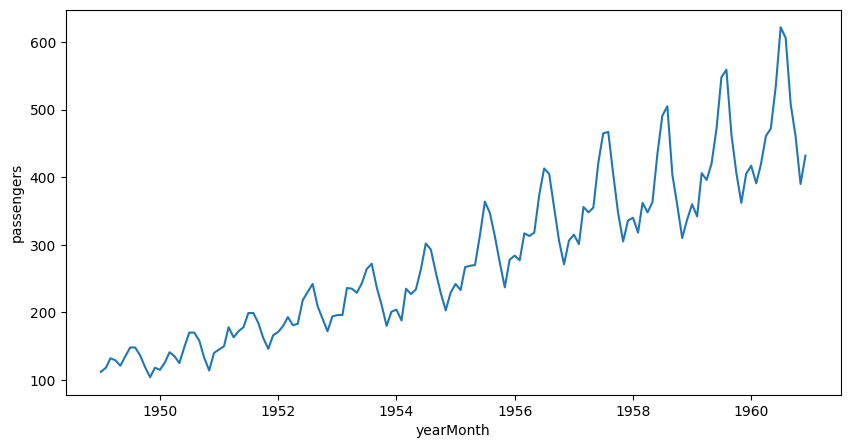

In [15]:
# Visualize the time series
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x= df.index, y= df.passengers)
plt.show()

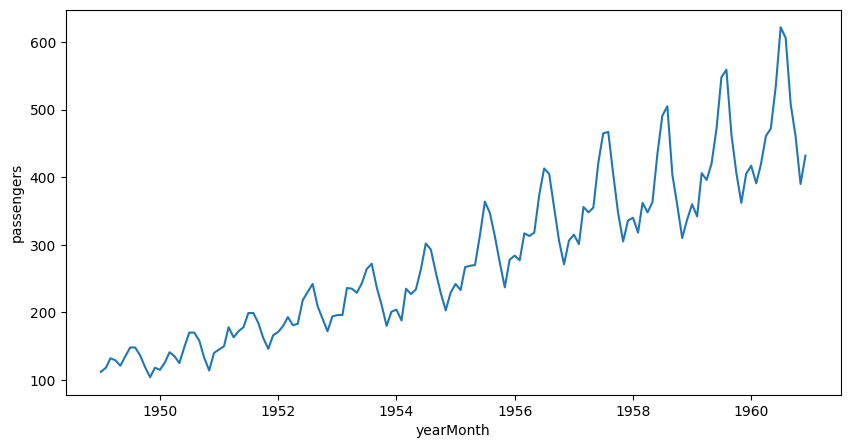

In [19]:
# Visualize the time series /Alternate 
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x= df.index, y= df['passengers'])
plt.show()

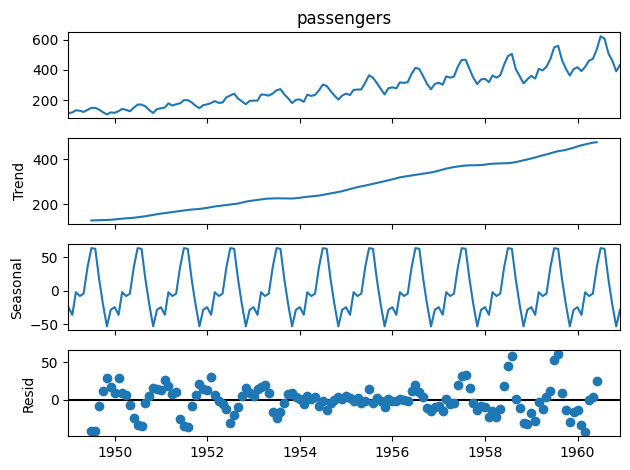

In [20]:
# Check furether for seasonlity and trend by doing decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers, period = 12)
fig = decomposition.plot()
plt.show()
# Upward trend and clear seasonality

In [22]:
# Check if the time series is stationary 
# Rolling mean adn std dev for 12 months
df['rollMean'] = df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()


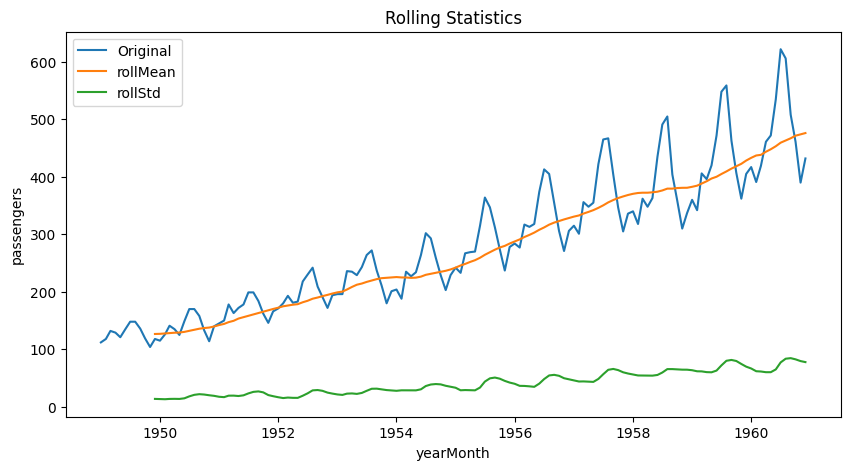

In [23]:
# Plot original series with rolling mean and std
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = df.index, y= df.passengers, label = 'Original')
sns.lineplot(data = df, x = df.index, y= df.rollMean, label = 'rollMean')
sns.lineplot(data = df, x = df.index, y= df.rollStd, label = 'rollStd')
plt.title("Rolling Statistics")
plt.show()

# A time series is stationary if the rolling mean and rolling std deviation are in a straight like line 1) mean is NOT in a straight line, 2) std deviation is in a straight line... Conclusion: Our time series is NOT stationary - If a time series is not stationary, we can not make predictions about the future dates...

In [34]:
# Define the function for stationarity check (only p-value based)
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataFrame[var])
    p_value=adf_result[1]
    print(f"ADF p_value : {p_value:.4f}")
    if p_value<0.05:
        print("The time series is stationary (reject H0).")
    else:
        print("The time series is not stationary (fail to reject H0).")

    # Plot
    plt.figure(figsize=(10,5))
    sns.lineplot(data = dataFrame, x = dataFrame.index, y = var, label ='Original')
    sns.lineplot(data = dataFrame, x = dataFrame.index , y = 'rollMean',label = 'RollingMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index , y = 'rollStd',label = 'RollingStd')
    plt.title("Statioinarity Check using Rolling Mean & Std Dev")
    plt.legend()
    plt.show()


ADF p_value : 0.9919
The time series is not stationary (fail to reject H0).


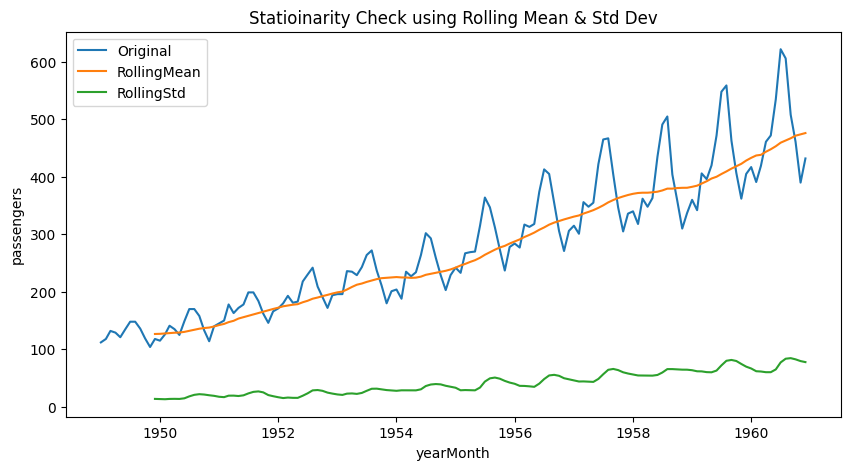

In [35]:
# Call the function to test stationarity
test_stationarity(df,'passengers')

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0
ADF p_value : 0.0542
The time series is not stationary (fail to reject H0).


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_5060\2211936836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_5060\2211936836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


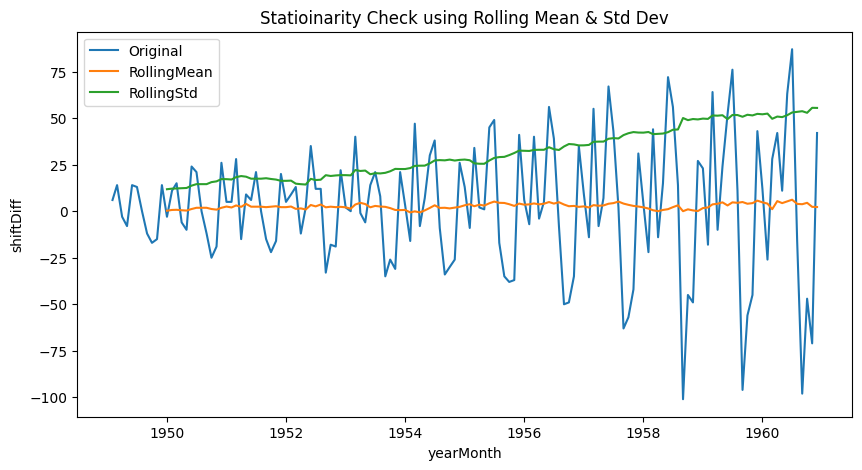

In [36]:
# Just get the passengers column into a new dataframe for easier testing 
air_df = df[['passengers']].copy()
#Try to shift - diff of 1
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers']-air_df['shift']
print(air_df.head(20))
#Test Stationarity
test_stationarity(air_df.dropna(),'shiftDiff')
# Conclusion: The data has become somewhat stationary

In [45]:
# ARIMA
# In google colab, you may need !pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


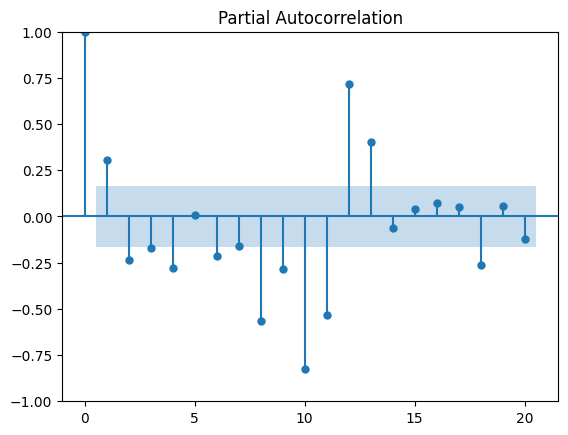

In [50]:
#plot_pacf(air_df['firstDiff'].dropna(),lags=20)
plot_pacf(air_df['shiftDiff'].dropna(), lags=20, method='ols')
plt.show()

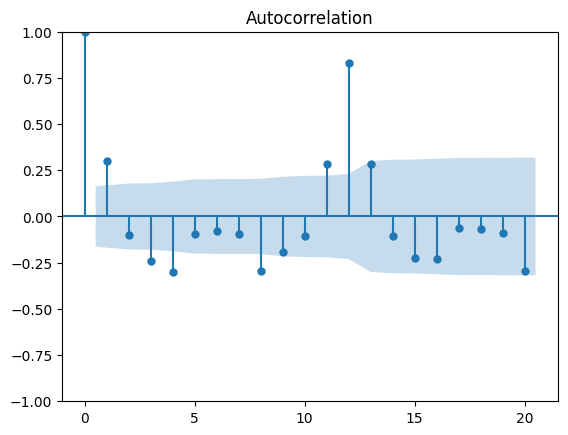

In [51]:
# Now let us take this value as p =1 and find q, for which we need ACF
plot_acf(air_df['shiftDiff'].dropna(),lags=20)
plt.show()

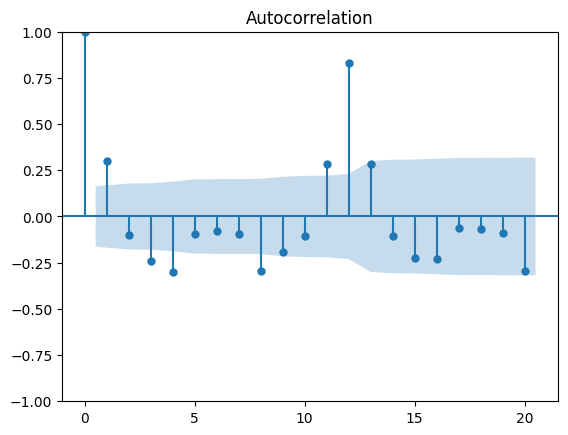

In [52]:
# Now let us take this value as p =1 and find q, for which we need ACF
plot_acf(air_df['shiftDiff'].dropna(),lags=20)
plt.show()
#q is also 1

In [53]:
#Build ARIMA model
train = air_df[:round(len(air_df)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

            passengers  shift  shiftDiff
yearMonth                               
1957-01-01         315  306.0        9.0
1957-02-01         301  315.0      -14.0
1957-03-01         356  301.0       55.0
1957-04-01         348  356.0       -8.0
1957-05-01         355  348.0        7.0


In [54]:
test = air_df[round(len(air_df)*70/100):] # Take the last 30 % data, starting from 71%
print(test.head()) # Just to check where it starts

            passengers  shift  shiftDiff
yearMonth                               
1957-06-01         422  355.0       67.0
1957-07-01         465  422.0       43.0
1957-08-01         467  465.0        2.0
1957-09-01         404  467.0      -63.0
1957-10-01         347  404.0      -57.0


In [57]:
model = ARIMA(train['passengers'],order=(1,2,1)) #Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['arimaPred'] = prediction
print(air_df.tail())

            passengers  shift  shiftDiff   airmaPred   arimaPred
yearMonth                                                       
1960-08-01         606  622.0      -16.0  451.950367  451.950367
1960-09-01         508  606.0      -98.0  454.403698  454.403698
1960-10-01         461  508.0      -47.0  456.857028  456.857028
1960-11-01         390  461.0      -71.0  459.310359  459.310359
1960-12-01         432  390.0       42.0  461.763689  461.763689


C:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


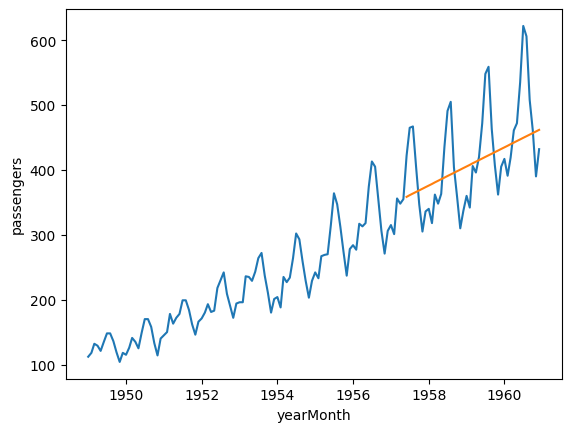

In [58]:
# Plot 
sns.lineplot(data=air_df,x=air_df.index, y='passengers')
sns.lineplot(data=air_df,x=air_df.index, y='arimaPred')
plt.show()
#Conclusion: The Arima prediction is not good

In [59]:
# SARIMAX prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [63]:
model = SARIMAX(train['passengers'], order=(1,2,1),seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end = test.index[-1] )
air_df['sarimaxPred'] = prediction
print(air_df.tail())
# Data looks better

C:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  shift  shiftDiff   airmaPred   arimaPred  sarimaxPred
yearMonth                                                                    
1960-08-01         606  622.0      -16.0  451.950367  451.950367   588.712781
1960-09-01         508  606.0      -98.0  454.403698  454.403698   518.322965
1960-10-01         461  508.0      -47.0  456.857028  456.857028   452.544738
1960-11-01         390  461.0      -71.0  459.310359  459.310359   402.764154
1960-12-01         432  390.0       42.0  461.763689  461.763689   450.739646


            passengers  shift  shiftDiff  airmaPred  arimaPred  sarimaxPred
yearMonth                                                                  
1949-01-01         112    NaN        NaN        NaN        NaN          NaN
1949-02-01         118  112.0        6.0        NaN        NaN          NaN
1949-03-01         132  118.0       14.0        NaN        NaN          NaN
1949-04-01         129  132.0       -3.0        NaN        NaN          NaN
1949-05-01         121  129.0       -8.0        NaN        NaN          NaN


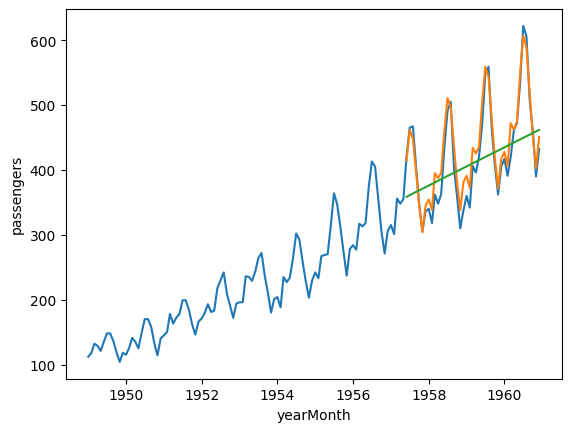

In [68]:
# Plot 
air_df.dropna()
print(air_df.head())
sns.lineplot(data = air_df, x = air_df.index, y= 'passengers')
sns.lineplot(data = air_df, x = air_df.index, y = 'sarimaxPred')
sns.lineplot(data = air_df, x = air_df.index, y = 'arimaPred')
plt.show()
# SARIMAX predictions are much more accurate

In [70]:
# Future prediction
# First check the last date in our dataset
print(air_df.tail())

            passengers  shift  shiftDiff   airmaPred   arimaPred  sarimaxPred
yearMonth                                                                    
1960-08-01         606  622.0      -16.0  451.950367  451.950367   588.712781
1960-09-01         508  606.0      -98.0  454.403698  454.403698   518.322965
1960-10-01         461  508.0      -47.0  456.857028  456.857028   452.544738
1960-11-01         390  461.0      -71.0  459.310359  459.310359   402.764154
1960-12-01         432  390.0       42.0  461.763689  461.763689   450.739646


In [74]:
# MS: Month Start frequency
# Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01',end = '1962-12-01',freq = 'MS'),columns = ['Dates'])
futureDate.set_index('Dates',inplace = True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [76]:
# Predict and print
print(model_fit.predict(start = futureDate.index[0],end = futureDate.index[-1]))


1961-01-01    462.503210
1961-02-01    437.492312
1961-03-01    508.290339
1961-04-01    497.666563
1961-05-01    510.967658
1961-06-01    591.607290
1961-07-01    652.260401
1961-08-01    631.953782
1961-09-01    555.770525
1961-10-01    485.267144
1961-11-01    431.912483
1961-12-01    482.473045
1962-01-01    494.871999
1962-02-01    466.710464
1962-03-01    541.859145
1962-04-01    530.228678
1962-05-01    544.951158
1962-06-01    630.634023
1962-07-01    694.738020
1962-08-01    672.288082
1962-09-01    590.211648
1962-10-01    514.893640
1962-11-01    457.915865
1962-12-01    510.964067
Freq: MS, Name: predicted_mean, dtype: float64


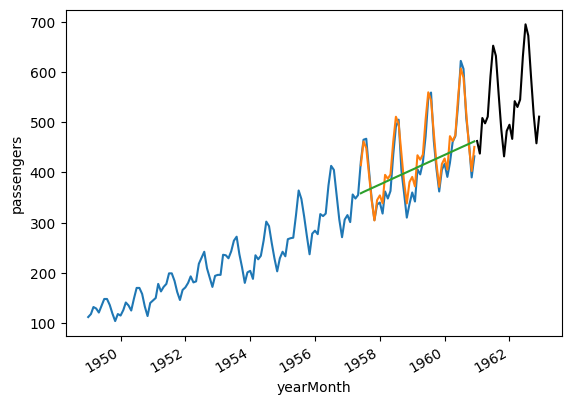

In [78]:
# Plot
air_df.dropna()
sns.lineplot(data = air_df, x= air_df.index , y = 'passengers')
sns.lineplot(data = air_df, x= air_df.index , y = 'sarimaxPred')
sns.lineplot(data = air_df, x= air_df.index , y = 'arimaPred')
model_fit.predict(start = futureDate.index[0],end = futureDate.index[-1]).plot(color = 'black')
plt.show()

In [117]:
# Model Evaluation
air_df.dropna()
print(air_df.tail())


            passengers  shift  shiftDiff   airmaPred   arimaPred  sarimaxPred
yearMonth                                                                    
1960-08-01         606  622.0      -16.0  451.950367  451.950367   588.712781
1960-09-01         508  606.0      -98.0  454.403698  454.403698   518.322965
1960-10-01         461  508.0      -47.0  456.857028  456.857028   452.544738
1960-11-01         390  461.0      -71.0  459.310359  459.310359   402.764154
1960-12-01         432  390.0       42.0  461.763689  461.763689   450.739646


In [118]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
# Arima Evaluation
mae = mean_absolute_error(air_df['passengers'],air_df['arimaPred'])
rmse = root_mean_squared_error(air_df['passengers'],air_df['arimaPred'])
r2 = r2_score(air_df['passengers'],air_df['arimaPred'])
print(f"ARIMA MAE: {mae}, RMSE: {rmse}, R^2:{r2_scor}")
air_df.tail()

ARIMA MAE: 55.3796462443972, RMSE: 69.01289539391041, R^2:0.1894657808447744


,passengers,shift,shiftDiff,airmaPred,arimaPred,sarimaxPred
yearMonth,,,,,,
1960-08-01,606,622.0,-16.0,451.950367,451.950367,588.712781
1960-09-01,508,606.0,-98.0,454.403698,454.403698,518.322965
1960-10-01,461,508.0,-47.0,456.857028,456.857028,452.544738
1960-11-01,390,461.0,-71.0,459.310359,459.310359,402.764154
1960-12-01,432,390.0,42.0,461.763689,461.763689,450.739646


In [120]:
# Sarimax Evaluation
mae = mean_absolute_error(air_df['passengers'],air_df['sarimaxPred'])
rmse= root_mean_squared_error(air_df['passengers'],air_df['sarimaxPred'])
r2 = r2_score(air_df['passengers'],air_df['sarimaxPred'])
print(mae,rmse,r2_scor)

18.478660026026912 22.02769227558106 0.9174249472981966
